In [2]:
import csv
import datetime
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import IPython.display

plt.rcParams['font.family'] = ["D2Coding"]

In [6]:
covid_kor_dict = {}
covid_world_dict = {}

with open("dataset/covid19/owid-covid-data.csv", "r", encoding='utf-8') as f:
    _csv = csv.DictReader(f)
    for row in _csv:
        if row["location"] == "South Korea":
            _date = datetime.datetime.strptime(row["date"], "%Y-%m-%d")
            if row["new_cases"]:
                covid_kor_dict[_date] = int(float(row["new_cases"]))
            else:
                covid_kor_dict[_date] = 0
        elif row["location"] == "World":
            _date = datetime.datetime.strptime(row["date"], "%Y-%m-%d")
            if row["new_cases"]:
                covid_world_dict[_date] = int(float(row["new_cases"]))
            else:
                covid_world_dict[_date] = 0


kospi_dict = {}
kosdaq_dict = {}

with open("dataset/covid19/주식시장.csv", "r", encoding='utf-8') as f:
    _csv = csv.DictReader(f)
    for i, row in enumerate(_csv):
        if i == 0:
            temp_ksp = row
        elif i == 7:
            temp_kdq = row

for i, k in list(temp_ksp.items())[1:]:
    dtm = datetime.datetime.strptime(i, "%Y. %m. %d")
    kospi_dict[dtm] = float(k)

for i, k in list(temp_kdq.items())[1:]:
    dtm = datetime.datetime.strptime(i, "%Y. %m. %d")
    kosdaq_dict[dtm] = float(k)


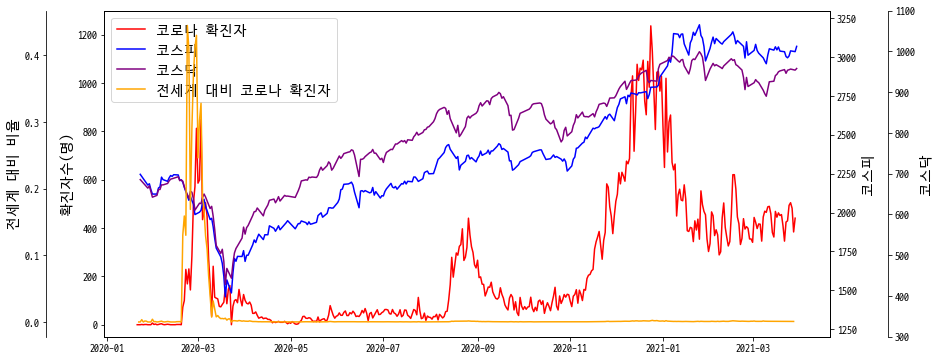

In [29]:
covid_kor_data = list(covid_kor_dict.items())
covid_world_data = list(covid_world_dict.items())
covid_kor_data.sort()
covid_world_data.sort()

covid_kor_data = covid_kor_data[:-1]

date_domain = list(covid_world_dict.keys())[:-1]

kospi_data = list(kospi_dict.items())
kospi_data.sort()
kosdaq_data = list(kosdaq_dict.items())
kosdaq_data.sort()

fig, ax = plt.subplots(figsize=(13, 6))

ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.08))

ax4 = ax.twinx()
ax4.spines["left"].set_visible(True)
ax4.yaxis.set_label_position('left')
ax4.yaxis.set_ticks_position('left')
ax4.spines["left"].set_position(("axes", -0.08))

p_kor_covid, = ax.plot([i[0] for i in covid_kor_data], [i[1]for i in covid_kor_data], "red", label="코로나 확진자")
ax.set_ylim((-50, 1300))
ax.set_ylabel("확진자수(명)", fontsize=14)

p_rate_covid, = ax4.plot(date_domain, [0 if covid_world_dict[d] == 0 else covid_kor_dict[d]/covid_world_dict[d] for d in date_domain],
                         "orange",
                         label="전세계 대비 코로나 확진자")
#ax4.set_ylim()
ax4.set_ylabel("전세계 대비 비율", fontsize=14)

p_kospi, = ax2.plot([kd[0] for kd in kospi_data], [kd[1] for kd in kospi_data], "blue", label="코스피")
ax2.set_ylim((1200, 3300))
ax2.set_ylabel("코스피", fontsize=14)

p_kosdaq, = ax3.plot([kd[0] for kd in kosdaq_data], [kd[1] for kd in kosdaq_data], "purple", label="코스닥")
ax3.set_ylim((300, 1100))
ax3.set_ylabel("코스닥", fontsize=14)

ax.legend(handles=[p_covid, p_kospi, p_kosdaq, p_rate_covid], loc=2, fontsize=14)

plt.show()